# <center> Multiscale Geographically Weighted Regression Workshop </center>
## <center> Part II - Mapping Results </center>
<center> Mehak Sachdeva </center>
<center> Spatial Analysis Research Center </center>
<center> School of Geographical Sciences and Urban Planning </center>
<center> Arizona State University </center>



## Download the zipped data folder [here](https://github.com/mehak-sachdeva/MGWR_Workshop_2020/archive/master.zip) to follow along!



# Installing and importing libraries for Python for mapping results

In [16]:
#@title Python installation of custom libraries

! pip install -U mgwr
! pip install geopandas
! pip install pyshp
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz 2>/dev/null | tar xz
!apt-get install -qq g++ make
import os
os.chdir('/home/jovyan/work/MGWR_HIV/spatialindex-src-1.8.5')
!./configure 2>&1 >/dev/null && make 2>&1 >/dev/null && make install && ldconfig
!pip install -q rtree
!pip install matplotlib_scalebar

Requirement already up-to-date: mgwr in /opt/conda/lib/python3.7/site-packages (2.1.2)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
/home/jovyan/work/MGWR_HIV/spatialindex-src-1.8.5/missing: Unknown `--is-lightweight' option
Try `/home/jovyan/work/MGWR_HIV/spatialindex-src-1.8.5/missing --help' for more information
configure: WARNING: 'missing' script is too old or missing
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
src/tools/.libs/libtools.a(Tools.o): In function `Tools::TemporaryFile::T

make[2]: Entering directory '/home/jovyan/work/MGWR_HIV/spatialindex-src-1.8.5/src/capi'
make[3]: Entering directory '/home/jovyan/work/MGWR_HIV/spatialindex-src-1.8.5/src/capi'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/home/jovyan/work/MGWR_HIV/spatialindex-src-1.8.5/src/capi'
make[2]: Leaving directory '/home/jovyan/work/MGWR_HIV/spatialindex-src-1.8.5/src/capi'
make[2]: Entering directory '/home/jovyan/work/MGWR_HIV/spatialindex-src-1.8.5/src'
make[3]: Entering directory '/home/jovyan/work/MGWR_HIV/spatialindex-src-1.8.5/src'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/pkgconfig'
/bin/mkdir: cannot create directory ‘/usr/local/lib/pkgconfig’: Permission denied
Makefile:368: recipe for target 'install-pkgconfigDATA' failed
make[3]: *** [install-pkgconfigDATA] Error 1
make[3]: Leaving directory '/home/jovyan/work/MGWR_HIV/spatialindex-src-1.8.5/src'
Makefile:5

In [15]:
os.getcwd()

'/home/jovyan/work/MGWR_HIV'

In [19]:
!pip install rpy2

  Using cached rpy2-3.4.2.tar.gz (186 kB)
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python3.7 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-des3xd5e/rpy2/setup.py'"'"'; __file__='"'"'/tmp/pip-install-des3xd5e/rpy2/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-install-des3xd5e/rpy2/pip-egg-info
         cwd: /tmp/pip-install-des3xd5e/rpy2/
    Complete output (2 lines):
    ['cffi>=1.10.0', 'jinja2', 'pytz', 'tzlocal']
    Error: rpy2 in API mode cannot be built without R in the PATH or R_HOME defined. Correct this or force ABI mode-only by defining the environment variable RPY2_CFFI_MODE=ABI
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [20]:
#@title Python imports
# A bit of imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# # Load in the r magic
# %reload_ext rpy2.ipython
# %config IPCompleter.greedy=True
# %config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
sns.set(color_codes=True)
from sklearn import linear_model
from matplotlib.colors import LinearSegmentedColormap
from matplotlib_scalebar.scalebar import ScaleBar
import statsmodels.api as statm

import libpysal as ps
from mgwr.gwr import GWR
from mgwr.gwr import MGWR
from mgwr.sel_bw import Sel_BW
from spglm.family import Gaussian, Binomial, Poisson
import multiprocessing as mp
pool = mp.Pool()
import io

from google.colab import files
from IPython.display import Image

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#Upload the results .csv file output from the MGWR software
uploaded = files.upload('C:/users/Download/')

In [ ]:
#@title Importing the results csv file for mapping
census = pd.read_csv(io.StringIO(uploaded['MGWR_results_results.csv'].decode('utf-8')),sep=',')
census.columns

Index(['ind', 'x_coor', 'y_coor', 'y', 'ols_residual', 'mgwr_yhat',
       'mgwr_residual', 'localR2', 'beta_Intercept', 'beta_avg_age',
       'beta_avg_water_dist', 'beta_avg_sqft', 'beta_avg_basement',
       'beta_avg_index', 'beta_avg_unemp', 'beta_avg_tech', 'se_Intercept',
       'se_avg_age', 'se_avg_water_dist', 'se_avg_sqft', 'se_avg_basement',
       'se_avg_index', 'se_avg_unemp', 'se_avg_tech', 't_Intercept',
       't_avg_age', 't_avg_water_dist', 't_avg_sqft', 't_avg_basement',
       't_avg_index', 't_avg_unemp', 't_avg_tech', 'p_Intercept', 'p_avg_age',
       'p_avg_water_dist', 'p_avg_sqft', 'p_avg_basement', 'p_avg_index',
       'p_avg_unemp', 'p_avg_tech', 'sumW_Intercept', 'sumW_avg_age',
       'sumW_avg_water_dist', 'sumW_avg_sqft', 'sumW_avg_basement',
       'sumW_avg_index', 'sumW_avg_unemp', 'sumW_avg_tech'],
      dtype='object')

In [ ]:
b_cols = ['beta_Intercept', 'beta_avg_age','beta_avg_water_dist', 'beta_avg_sqft', 'beta_avg_basement','beta_avg_index', 'beta_avg_unemp', 'beta_avg_tech']
bt_cols = ['bt_constant','bt_age','bt_water_dist','bt_sqft','bt_round_basement','bt_index','bt_unemp','bt_tech']
t_cols = ['t_Intercept','t_avg_age', 't_avg_water_dist', 't_avg_sqft', 't_avg_basement','t_avg_index', 't_avg_unemp', 't_avg_tech']
t_crit = [2.93,2.946,2.996,2.992,2.576,2.39,2.042,2.138]

In [ ]:
for i in range(8):
    census.loc[census[t_cols[i]] >=t_crit[i], bt_cols[i]] = census[b_cols[i]]
    census.loc[census[t_cols[i]] <=-t_crit[i], bt_cols[i]] = census[b_cols[i]]

In [ ]:
uploaded = files.upload()
#upload the census_tract files from the downloaded folder

Saving census_tracts.cpg to census_tracts (1).cpg
Saving census_tracts.csv to census_tracts (1).csv
Saving census_tracts.dbf to census_tracts (1).dbf
Saving census_tracts.prj to census_tracts (1).prj
Saving census_tracts.shp to census_tracts (1).shp
Saving census_tracts.shx to census_tracts (1).shx


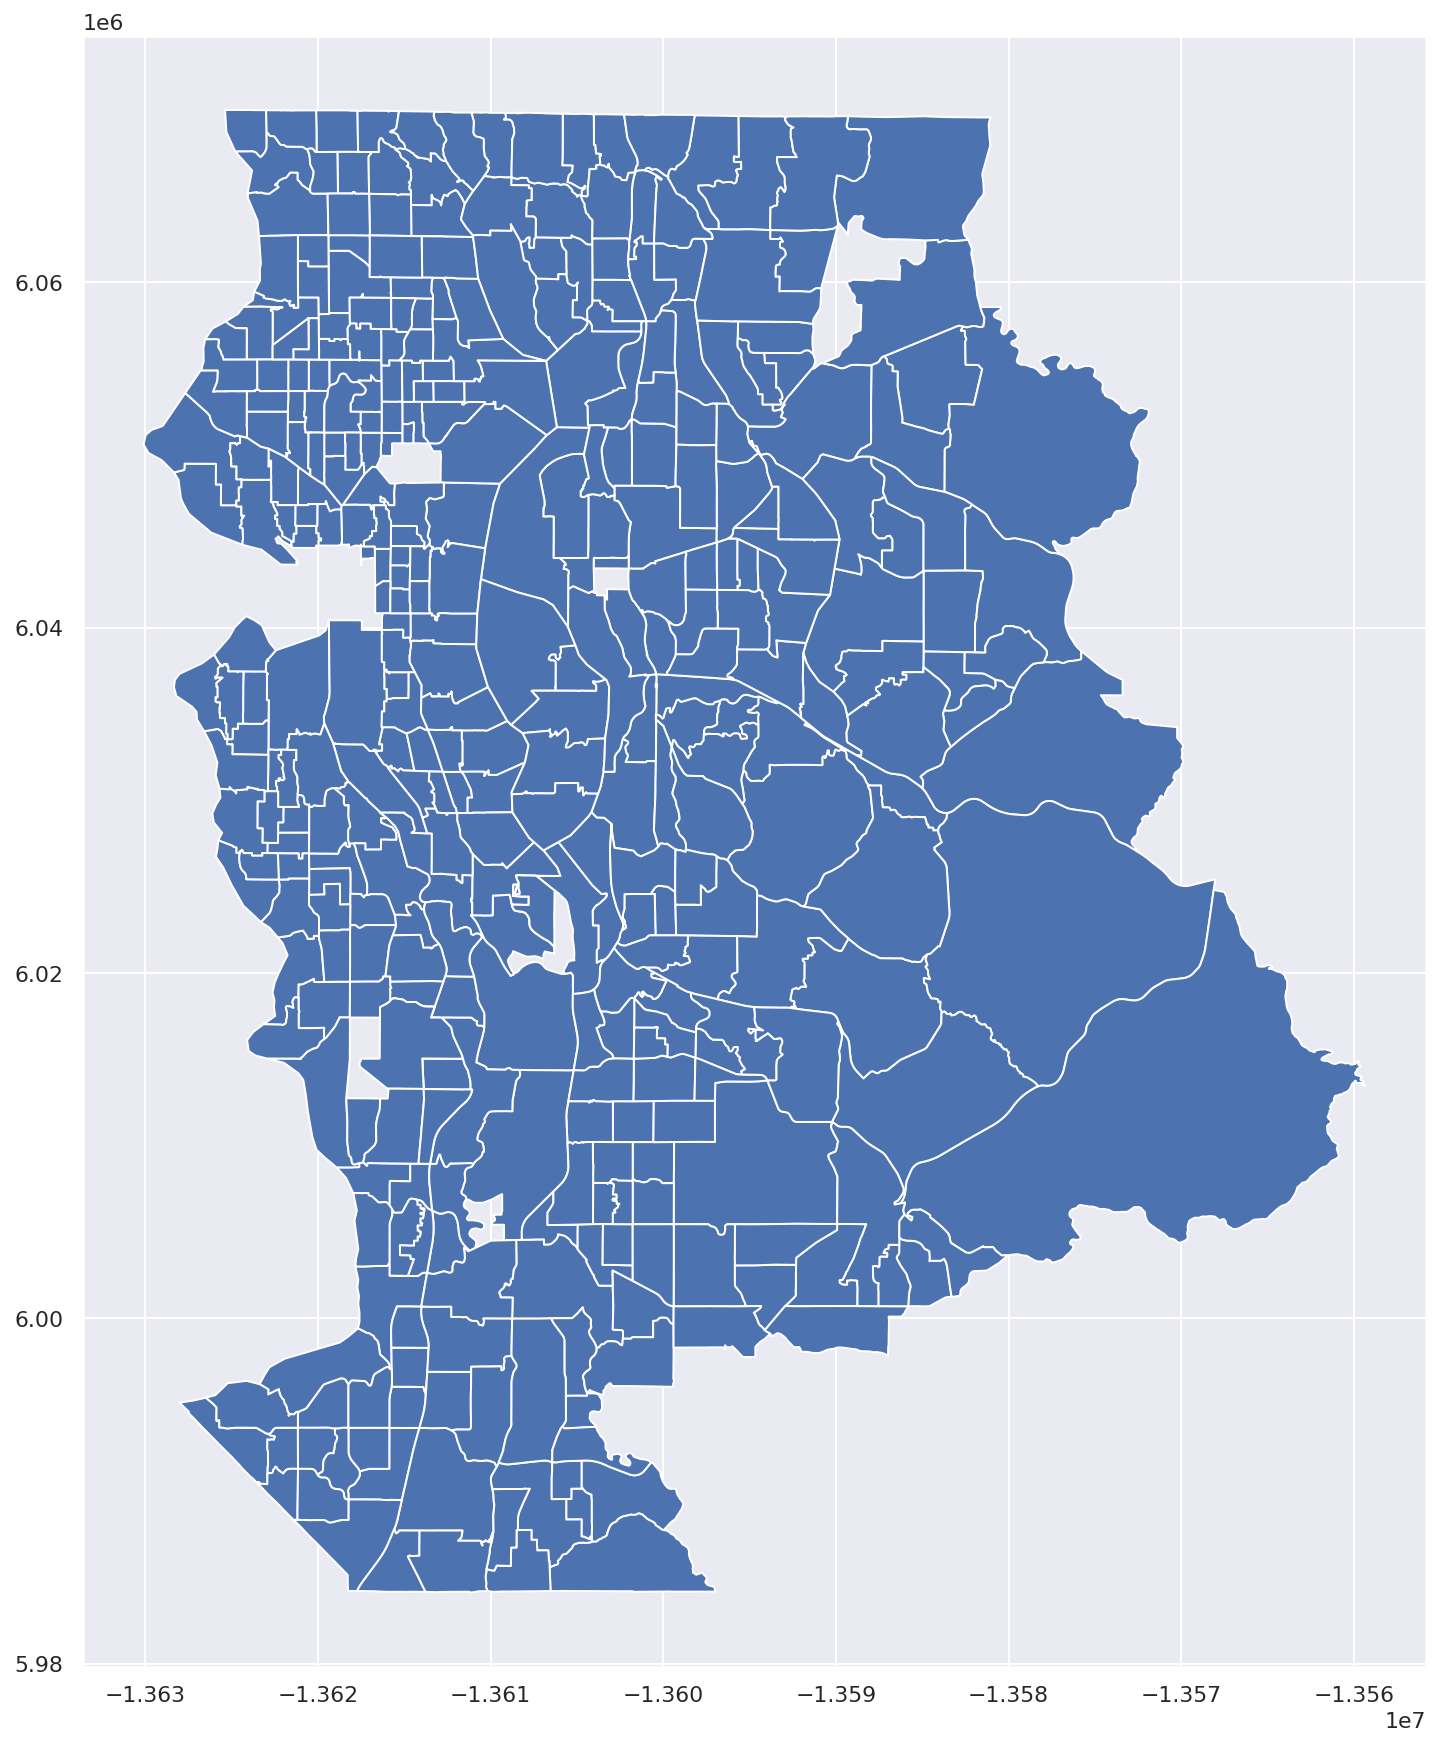

In [ ]:
c='census_tracts.shp'
crs = {'EPSG':'4326'}
geo = gpd.read_file(c,crs=crs)[['geometry','objectid']]
fig,ax = plt.subplots(figsize=(20,15))
geo.plot(ax=ax)

In [ ]:
geo.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
census.columns

Index(['ind', 'x_coor', 'y_coor', 'y', 'ols_residual', 'mgwr_yhat',
       'mgwr_residual', 'localR2', 'beta_Intercept', 'beta_avg_age',
       'beta_avg_water_dist', 'beta_avg_sqft', 'beta_avg_basement',
       'beta_avg_index', 'beta_avg_unemp', 'beta_avg_tech', 'se_Intercept',
       'se_avg_age', 'se_avg_water_dist', 'se_avg_sqft', 'se_avg_basement',
       'se_avg_index', 'se_avg_unemp', 'se_avg_tech', 't_Intercept',
       't_avg_age', 't_avg_water_dist', 't_avg_sqft', 't_avg_basement',
       't_avg_index', 't_avg_unemp', 't_avg_tech', 'p_Intercept', 'p_avg_age',
       'p_avg_water_dist', 'p_avg_sqft', 'p_avg_basement', 'p_avg_index',
       'p_avg_unemp', 'p_avg_tech', 'sumW_Intercept', 'sumW_avg_age',
       'sumW_avg_water_dist', 'sumW_avg_sqft', 'sumW_avg_basement',
       'sumW_avg_index', 'sumW_avg_unemp', 'sumW_avg_tech', 'bt_constant',
       'bt_age', 'bt_water_dist', 'bt_sqft', 'bt_round_basement', 'bt_index',
       'bt_unemp', 'bt_tech'],
      dtype='object')

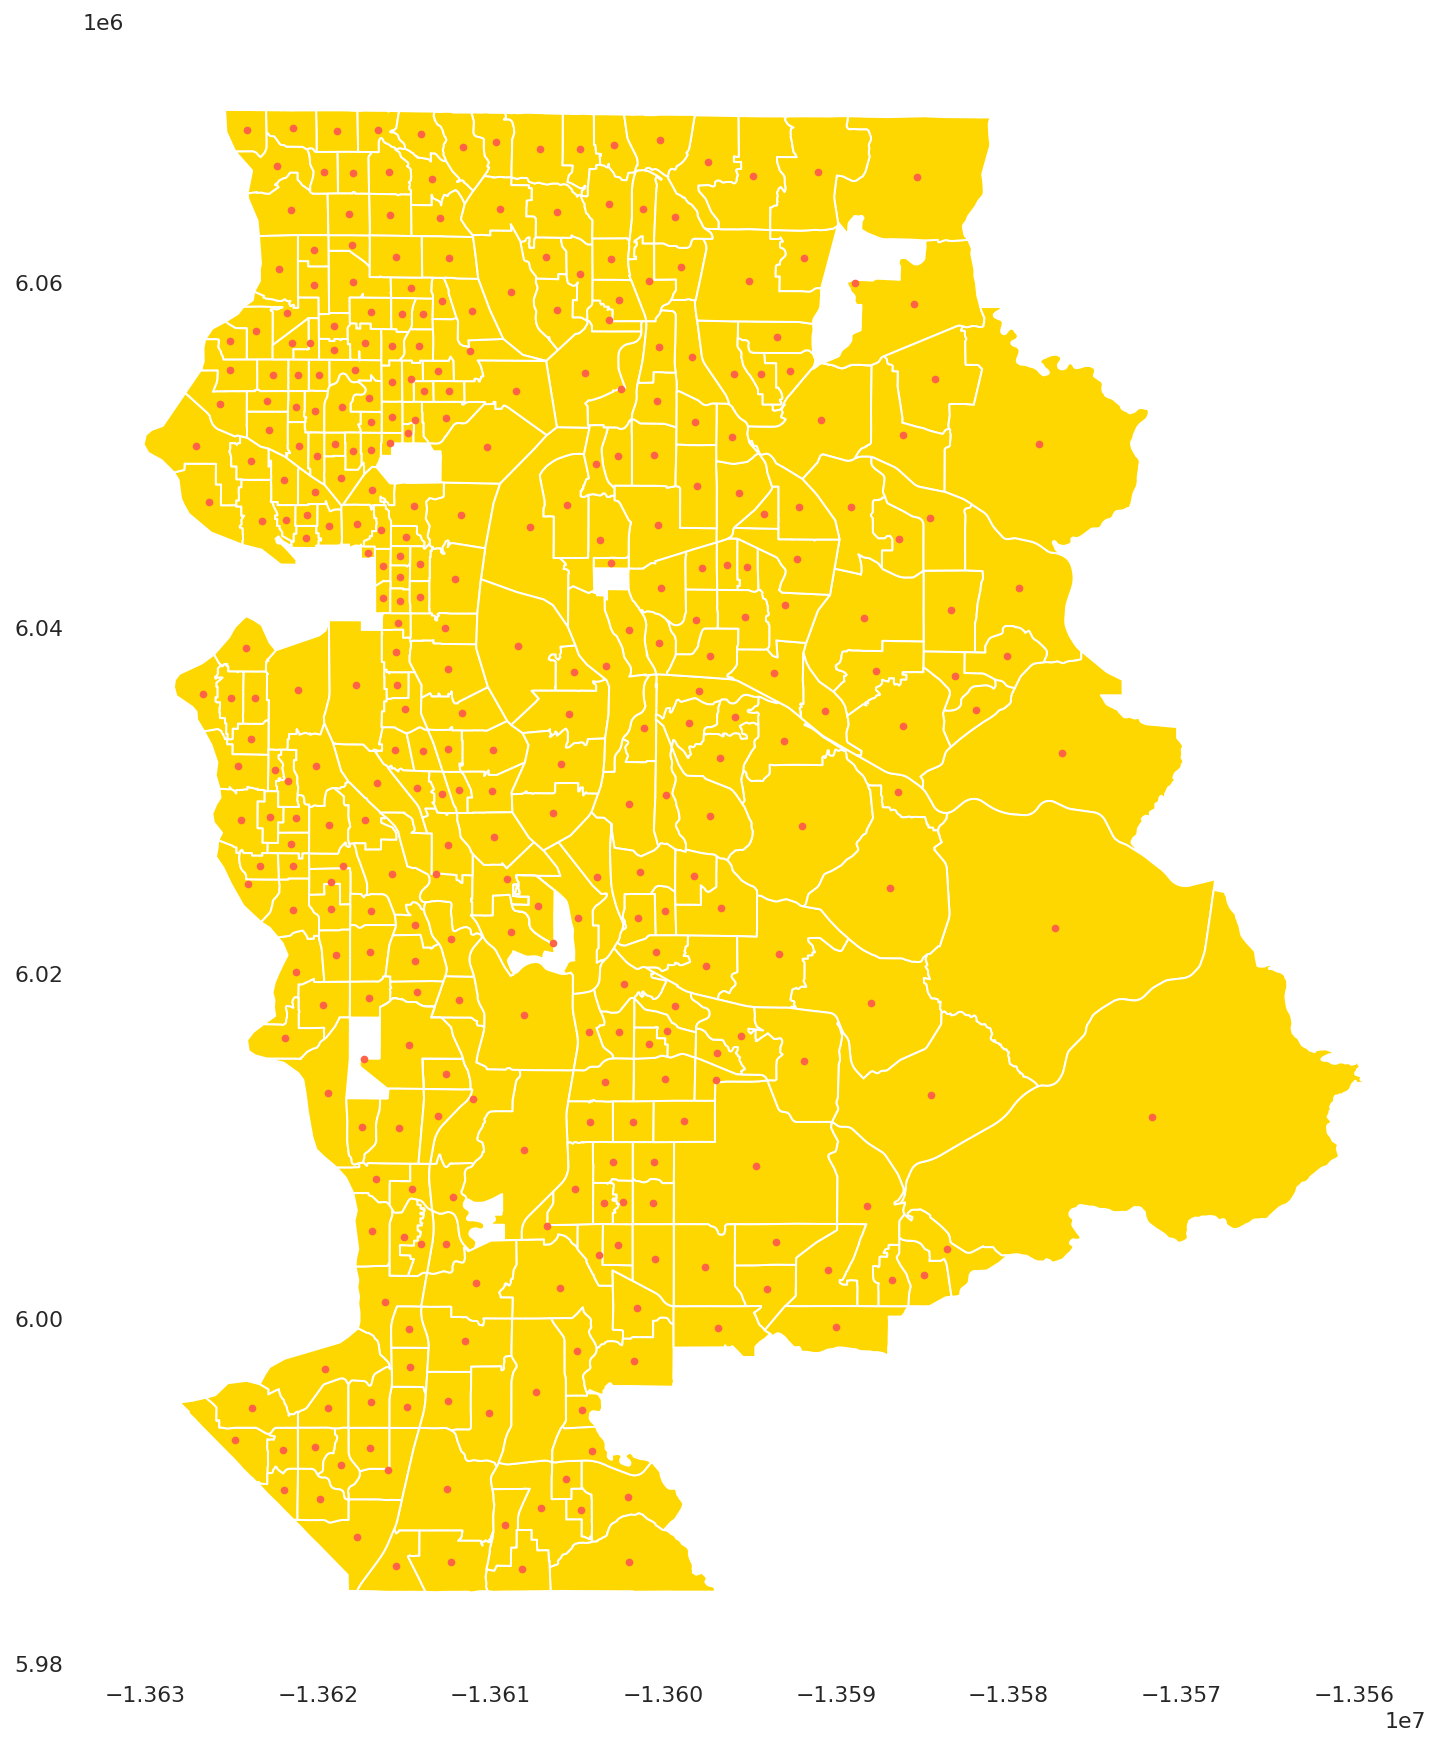

In [ ]:
coords = np.array(list(zip(census['x_coor'],census['y_coor'])))
geom_points = [Point(xy) for xy in coords]
geo_df = gpd.GeoDataFrame(census,crs={'init':'epsg:4326'},geometry=geom_points)
geo_df = geo_df.rename(columns={'OBJECTID':'index'})
geo_df = geo_df.to_crs(epsg=3857)
final_geo = gpd.sjoin(geo, geo_df, how='inner',op='contains',lsuffix='left',rsuffix='right')

fig,ax = plt.subplots(figsize=(20,15))
ax.set_facecolor('white')
final_geo.plot(ax=ax, color='gold')
geo_df.plot(ax=ax, markersize=8,alpha=1,color='tomato',marker="o")

# Plotting the results

In [ ]:
from google.colab import files
uploaded = files.upload()
# upload the more_labels_new files from the downloaded folder

Saving more_labels_new.cpg to more_labels_new (1).cpg
Saving more_labels_new.csv to more_labels_new (1).csv
Saving more_labels_new.dbf to more_labels_new (1).dbf
Saving more_labels_new.prj to more_labels_new (1).prj
Saving more_labels_new.sbn to more_labels_new (1).sbn
Saving more_labels_new.sbx to more_labels_new (1).sbx
Saving more_labels_new.shp to more_labels_new (1).shp
Saving more_labels_new.shx to more_labels_new (1).shx


In [ ]:
import scipy as sp
import shapefile as shp

import matplotlib as mpl
import matplotlib.pyplot as plt
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return sp.ma.masked_array(sp.interp(value, x, y))

In [ ]:
label = gpd.read_file("more_labels_new.shp")

In [ ]:
label=label.to_crs(epsg=3857)
label=label.drop(label.index[3])
label=label.reset_index()
label=label.drop(label.index[5])
label=label.reset_index()
label

,level_0,index,FID_,Field1,latitude,longitude,names,geometry
0,0,0,0,0,47.600000,-122.3000,Seattle,POINT (-13614373.724 6040565.209)
1,1,1,1,1,47.610100,-122.2015,Bellevue,POINT (-13603408.754 6042232.762)
2,2,2,2,2,47.674000,-122.1215,Redmond,POINT (-13594503.195 6052790.400)
3,3,4,4,4,47.627740,-122.2420,Bill Gates' House,POINT (-13607917.194 6045145.975)
4,4,5,5,5,47.655548,-122.2950,University of Washington,POINT (-13613817.127 6049740.411)
5,6,7,7,7,47.488300,-121.9467,Tiger Mountain State Forest,POINT (-13575044.548 6022144.482)
6,7,8,8,8,47.479700,-122.2079,Renton,POINT (-13604121.199 6020727.860)
7,8,9,9,9,47.380900,-122.2348,Kent,POINT (-13607115.693 6004469.784)
8,9,10,10,10,47.322300,-122.3126,Federal Way,POINT (-13615776.350 5994841.228)
9,10,11,11,11,47.680000,-122.2290,Lake Washington,POINT (-13606470.040 6053782.392)


In [ ]:
def mapp(col,name,color,normal=False):  
    vmi=min(col[name])
    vma=max(col[name])
    figsize=(14,10)
    colors = 10
    norm = MidpointNormalize(vmin=vmi, vmax=vma, midpoint=0)
    colors = 6
    fig, ax = plt.subplots(1, figsize=(14, 14))

    if normal==True:
        col.plot(column=name, ax=ax,cmap=color,figsize=figsize,k=colors, linewidth=0.5,norm=norm)
    else:
        col.plot(column=name, ax=ax,cmap=color,figsize=figsize,k=colors, linewidth=0.5)

    ax.axis("off")

    Scalebar = ScaleBar(100000,location='lower left') # 1 pixel = 0.2 meter
    scatter = ax.collections[-1]

    plt.colorbar(scatter, ax=ax, extend='min',orientation='horizontal',fraction=0.046, pad=0.04)
    col.boundary.plot(ax=ax,color='grey',alpha=0.2)

    texts = []
    for x, y, lab in zip(label.geometry.x, label.geometry.y, label["names"]):
      texts.append(plt.text(x-1500, y-700, lab, fontsize = 8,horizontalalignment='left',verticalalignment='baseline',bbox=dict(facecolor='white', alpha=0.7,linewidth=0.0)))
    label.plot(ax=ax,alpha=1,color='black',linewidth=0.4)
    

    plt.show()

In [ ]:
final_geo.columns

Index(['geometry', 'objectid', 'index_right', 'ind', 'x_coor', 'y_coor', 'y',
       'ols_residual', 'mgwr_yhat', 'mgwr_residual', 'localR2',
       'beta_Intercept', 'beta_avg_age', 'beta_avg_water_dist',
       'beta_avg_sqft', 'beta_avg_basement', 'beta_avg_index',
       'beta_avg_unemp', 'beta_avg_tech', 'se_Intercept', 'se_avg_age',
       'se_avg_water_dist', 'se_avg_sqft', 'se_avg_basement', 'se_avg_index',
       'se_avg_unemp', 'se_avg_tech', 't_Intercept', 't_avg_age',
       't_avg_water_dist', 't_avg_sqft', 't_avg_basement', 't_avg_index',
       't_avg_unemp', 't_avg_tech', 'p_Intercept', 'p_avg_age',
       'p_avg_water_dist', 'p_avg_sqft', 'p_avg_basement', 'p_avg_index',
       'p_avg_unemp', 'p_avg_tech', 'sumW_Intercept', 'sumW_avg_age',
       'sumW_avg_water_dist', 'sumW_avg_sqft', 'sumW_avg_basement',
       'sumW_avg_index', 'sumW_avg_unemp', 'sumW_avg_tech', 'bt_constant',
       'bt_age', 'bt_water_dist', 'bt_sqft', 'bt_round_basement', 'bt_index',
       'bt_u

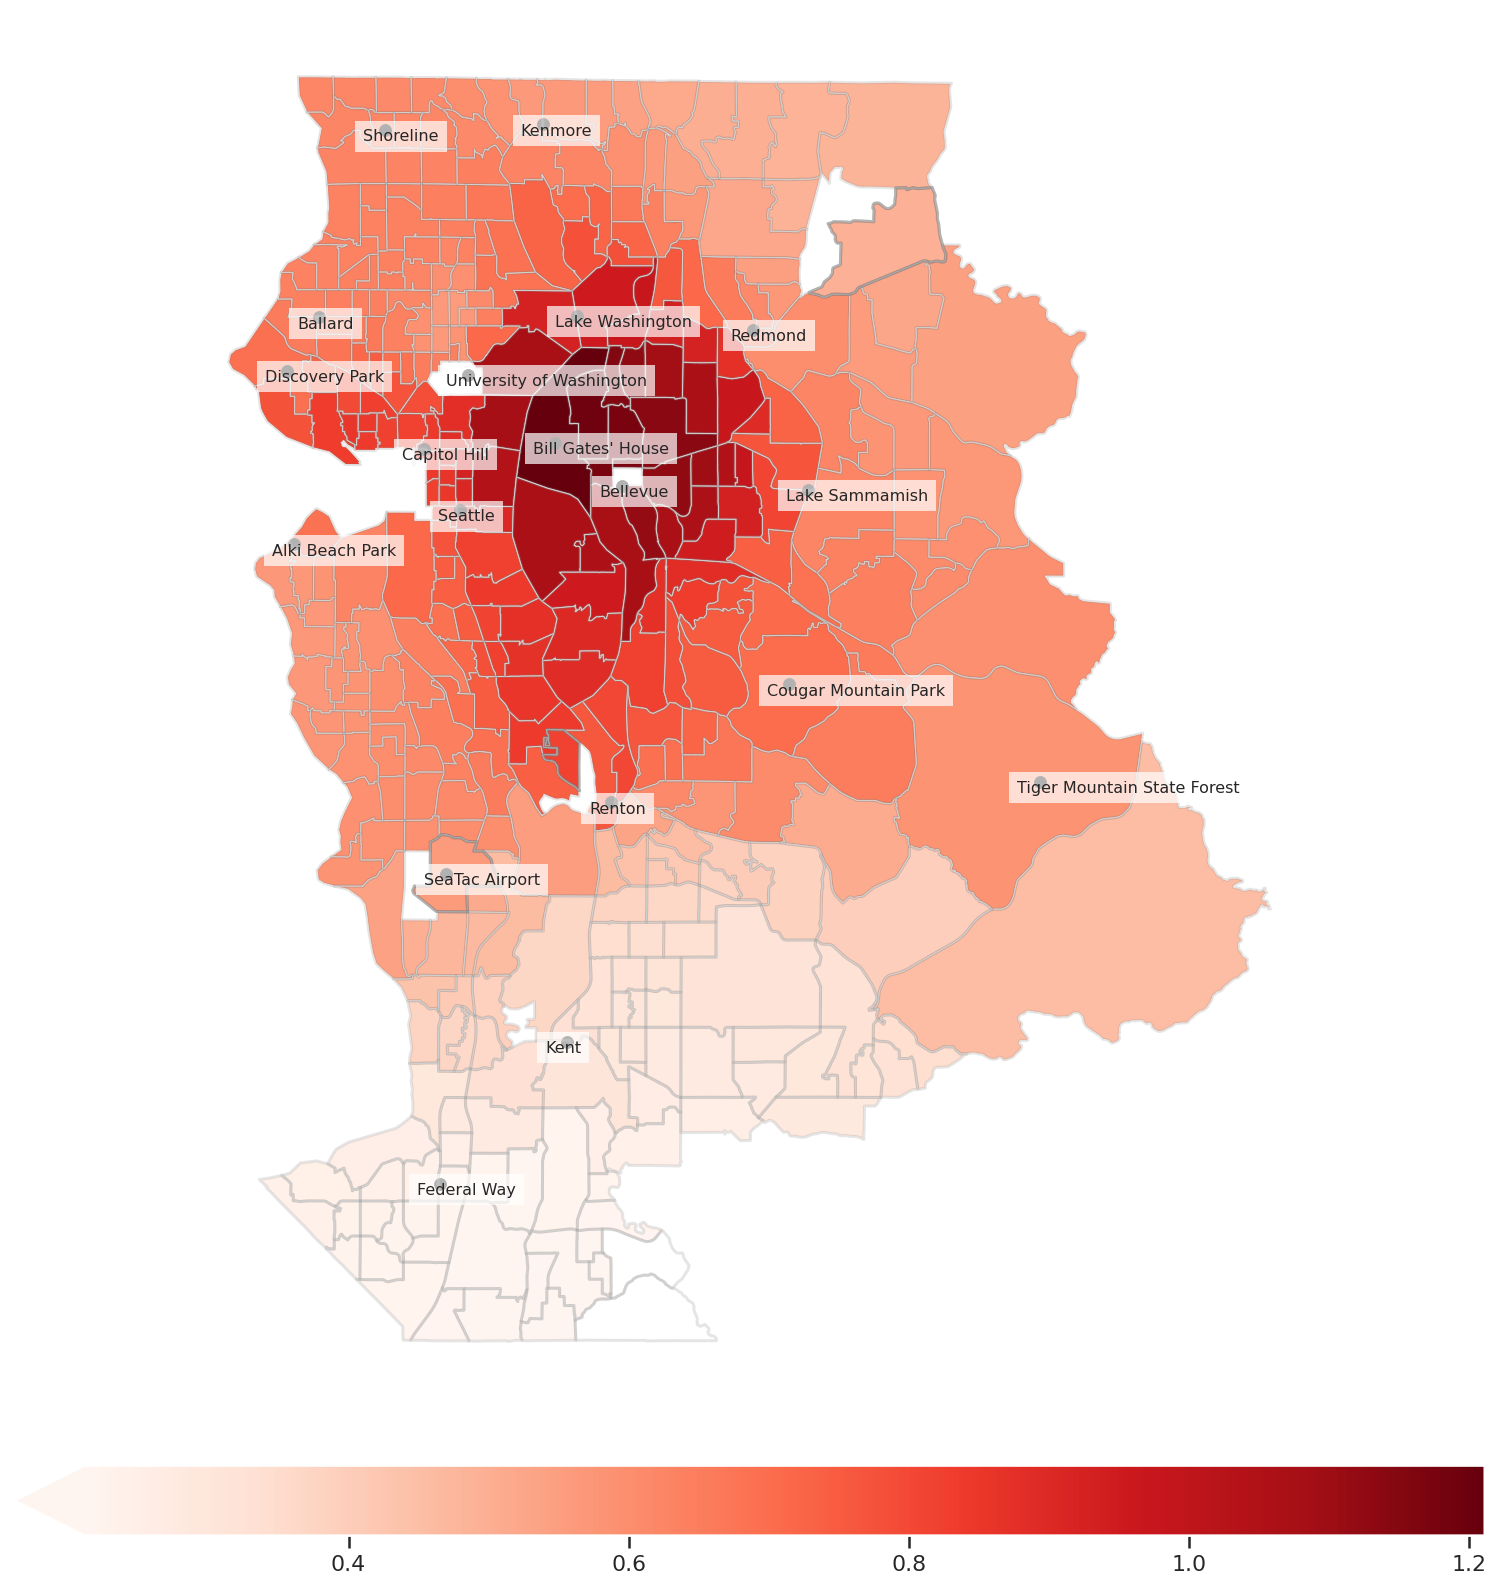

In [ ]:
mapp(col=final_geo,name='bt_sqft',color='Reds',normal=False)


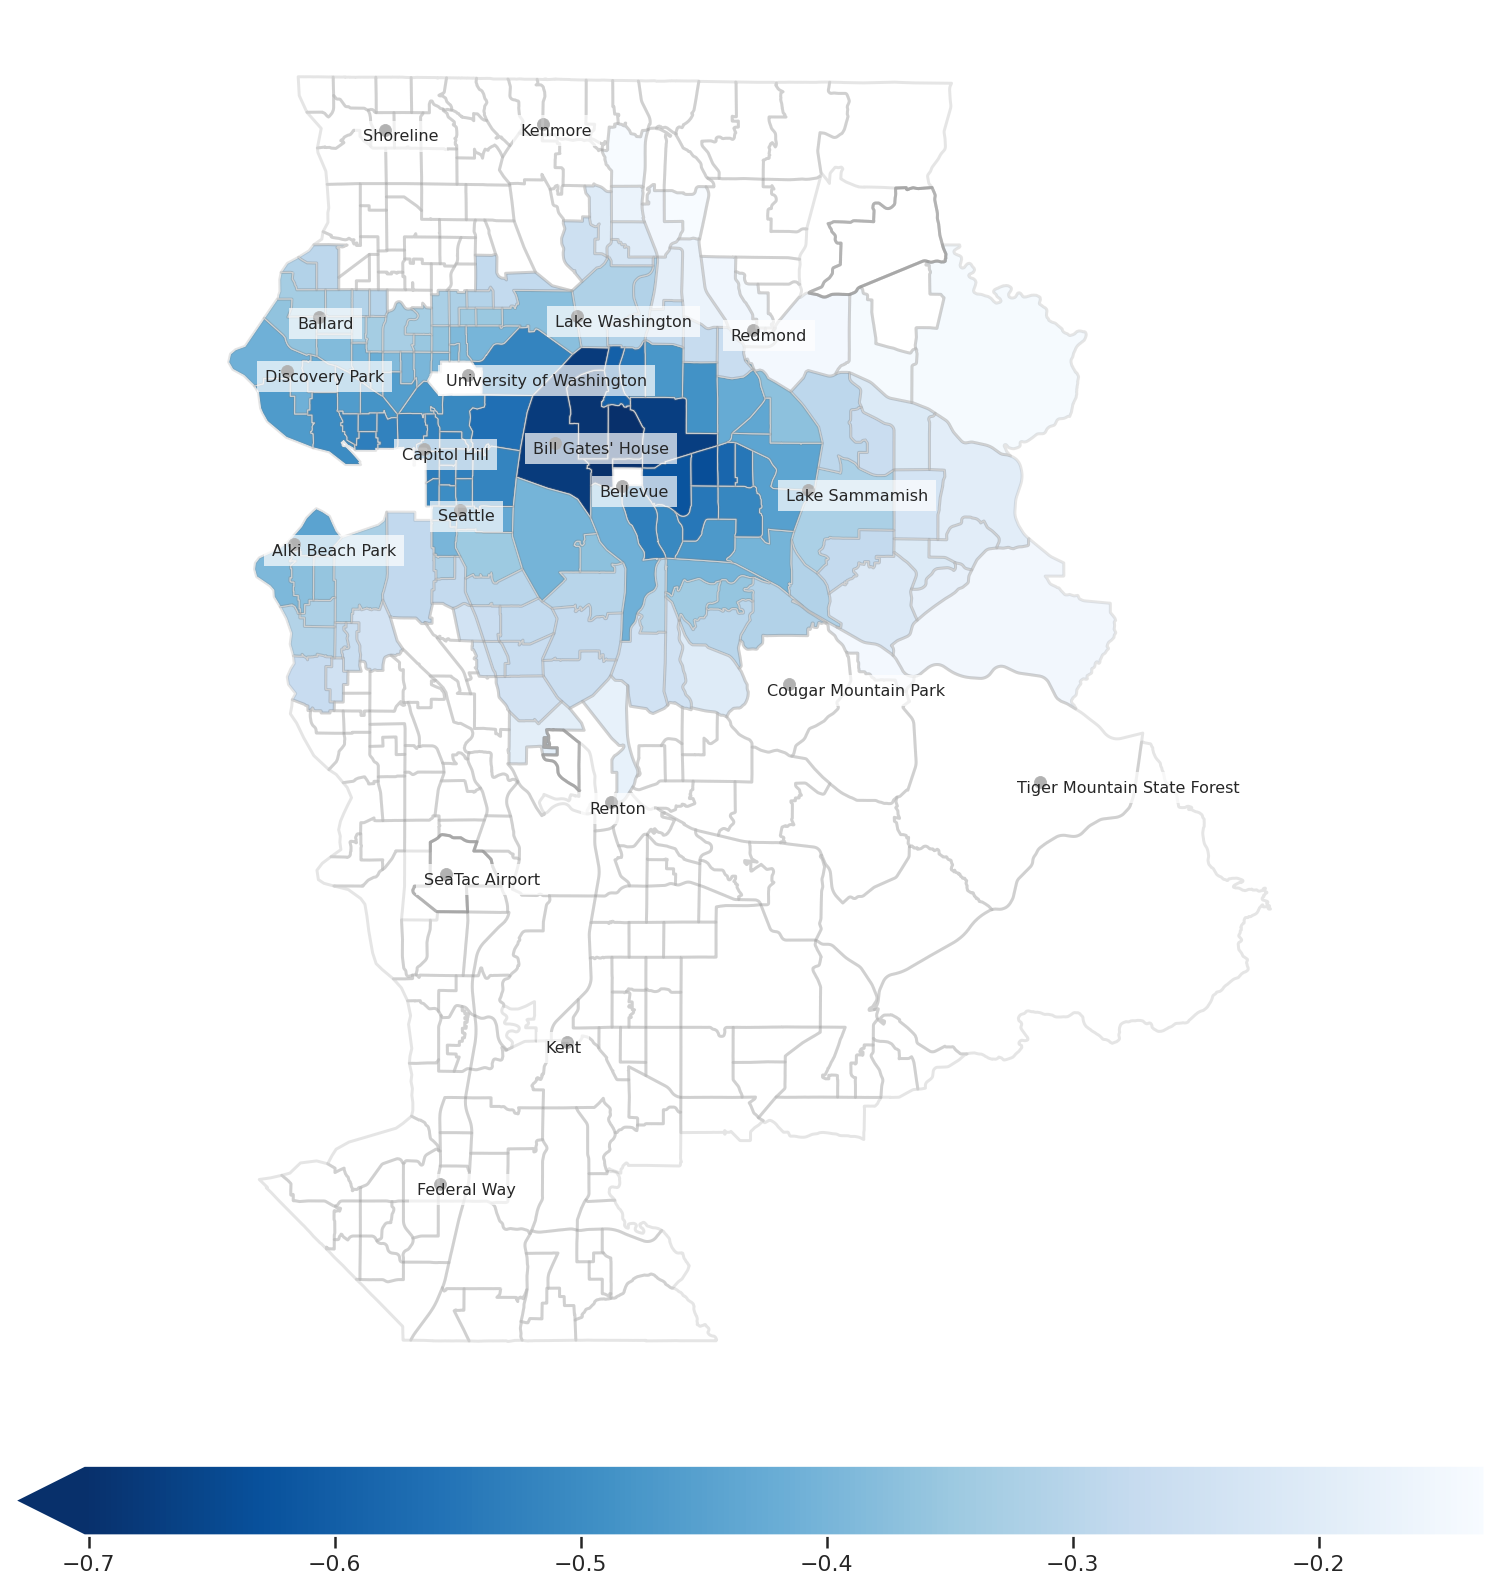

In [ ]:
mapp(col=final_geo,name='bt_water_dist',color='Blues_r',normal=False)
